In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

In [2]:

paths=[
    fr"E:\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_{round}\score_accuracy\split_auto_0_rest_10\xgbclass_10_2_0.csv"
    for dataset, round in product(["citeseer", "pubmed"], [0,1,2])
] + [
  fr"E:\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_{round}\score_accuracy\split_auto_0_rest_10\xgbclass_{n_class}_2_0.csv"
    for dataset, round, n_class in product(["pubmed"], [0,1,2], [100])  
    ] + [
    fr"E:\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_{round}\score_accuracy\split_auto_0_rest_10\xgbclass_{n_class}_2_0.csv"
    for dataset, round, n_class in product(["citeseer"], [0,1], [100]) 
]



In [3]:
dfs = [pd.read_csv(path) for path in paths]
df = pd.concat(dfs, axis=0)
df = df.reset_index(drop=True)

In [4]:
df

,dataset,group,round,score_name,num_val,num_test,max_split_seed,n_estimators,max_depth,clf_seed,train_per_class,split_seed,path,value
0,citeseer,NaN,0,accuracy,0,rest,10,10,2,0,1,0,snakemake_base/scores/citeseer_None/round_0/sc...,0.075015
1,citeseer,NaN,0,accuracy,0,rest,10,10,2,0,1,1,snakemake_base/scores/citeseer_None/round_0/sc...,0.075015
2,citeseer,NaN,0,accuracy,0,rest,10,10,2,0,1,2,snakemake_base/scores/citeseer_None/round_0/sc...,0.075015
3,citeseer,NaN,0,accuracy,0,rest,10,10,2,0,1,3,snakemake_base/scores/citeseer_None/round_0/sc...,0.075015
4,citeseer,NaN,0,accuracy,0,rest,10,10,2,0,1,4,snakemake_base/scores/citeseer_None/round_0/sc...,0.075015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,citeseer,NaN,1,accuracy,0,rest,10,100,2,0,175,5,snakemake_base/scores/citeseer_None/round_1/sc...,0.696729
4226,citeseer,NaN,1,accuracy,0,rest,10,100,2,0,175,6,snakemake_base/scores/citeseer_None/round_1/sc...,0.677719
4227,citeseer,NaN,1,accuracy,0,rest,10,100,2,0,175,7,snakemake_base/scores/citeseer_None/round_1/sc...,0.705128
4228,citeseer,NaN,1,accuracy,0,rest,10,100,2,0,175,8,snakemake_base/scores/citeseer_None/round_1/sc...,0.690097


In [5]:
df["split_seed"].unique(), df["clf_seed"].unique(), df["n_estimators"].unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([0], dtype=int64),
 array([ 10, 100], dtype=int64))

In [6]:
#df = pd.read_csv(path)
df = df.drop(["group", "num_val", "num_test",  "clf_seed", "max_split_seed"],axis=1)

In [7]:
def extract_num_train_from_path(s):
    return int(s.split("split_")[1].split("/xgbclass")[0].split("_")[0])
def extract_split_id_from_path(s):
    return int(s.split("split_")[1].split("/xgbclass")[0].split("_")[3])

In [8]:
df["train_per_class"] = df["path"].map(extract_num_train_from_path)
df = df.drop(["path"],axis=1)

In [9]:
df.dtypes

dataset             object
round                int64
score_name          object
n_estimators         int64
max_depth            int64
train_per_class      int64
split_seed           int64
value              float64
dtype: object

In [10]:
#df[df["train_per_class"]==1]["path"][0].split("split_")[1].split("/xgbclass")[0].split("_")

In [11]:
#df[df["train_per_class"]==1]["path"][1].split("split_")[1].split("/xgbclass")[0].split("_")

In [12]:
import matplotlib.pyplot as plt

In [13]:
df

,dataset,round,score_name,n_estimators,max_depth,train_per_class,split_seed,value
0,citeseer,0,accuracy,10,2,1,0,0.075015
1,citeseer,0,accuracy,10,2,1,1,0.075015
2,citeseer,0,accuracy,10,2,1,2,0.075015
3,citeseer,0,accuracy,10,2,1,3,0.075015
4,citeseer,0,accuracy,10,2,1,4,0.075015
...,...,...,...,...,...,...,...,...
4225,citeseer,1,accuracy,100,2,175,5,0.696729
4226,citeseer,1,accuracy,100,2,175,6,0.677719
4227,citeseer,1,accuracy,100,2,175,7,0.705128
4228,citeseer,1,accuracy,100,2,175,8,0.690097


In [14]:
df_agg = df.drop("split_seed",axis=1).groupby(["dataset", "round", "score_name", "n_estimators", "max_depth", "train_per_class"]).agg(["mean", "std"]).reset_index()

In [15]:
df_agg

dataset round score_name n_estimators max_depth train_per_class  \
                                                                        
0    citeseer     0   accuracy           10         2               1   
1    citeseer     0   accuracy           10         2               2   
2    citeseer     0   accuracy           10         2               3   
3    citeseer     0   accuracy           10         2               4   
4    citeseer     0   accuracy           10         2               5   
..        ...   ...        ...          ...       ...             ...   
418    pubmed     2   accuracy          100         2              90   
419    pubmed     2   accuracy          100         2             100   
420    pubmed     2   accuracy          100         2             125   
421    pubmed     2   accuracy          100         2             150   
422    pubmed     2   accuracy          100         2             175   

        value            
         mean       std  
0    0.075015  0.000000  
1    0.216848  0.076170  
2    0.322222  0.033484  
3    0.358850  0.033453  
4    0.385771  0.044870  
..        ...       ...  
418  0.813174  0.009330  
419  0.817593  0.009870  
420  0.824708  0.010734  
421  0.830166  0.008857  
422  0.833139  0.009268  

[423 rows x 8 columns]

In [16]:
def my_dataset_iter(df, names):
    if len(names) == 0:
        yield (df,)
        return
    name = names[0]
    for value in df[name].unique():
        df_tmp = df[df[name]==value]
        for tpl in my_dataset_iter(df_tmp, names[1:]):
            yield (value,)+tpl

In [17]:
def get_baseline(dataset):
    return {
        "citeseer" : (69.11/100, 0.61/100),
        "pubmed" : (76.77/100, 0.55/100)
    }[dataset]

def train_per_class_public(dataset):
    return {
        "citeseer" : 20,
        "pubmed" : 20
    }[dataset]


In [18]:
def my_plot(df, y_column, x_lim=None):
    colors = {10:"blue", 100:"red"}
    linestyles = ["-", "--", ":"]
    for dataset, metric, df1 in my_dataset_iter(df, ["dataset", "score_name"]):
        fig = plt.figure()
        x_max=1
        y_max=0.1
        for round, n_estimators, df2 in my_dataset_iter(df1, ["round", "n_estimators"]):
            plt.title(dataset)
            plt.errorbar(df2["train_per_class"], df2[y_column]["mean"], yerr=df2[y_column]["std"],
                         label=f"round {round}, esti={n_estimators}",
                        linestyle=linestyles[round], color=colors[n_estimators])

            plt.xlabel("num_train_per_class")
            plt.ylabel(metric)
            x_max = max(df2["train_per_class"].max(), x_max)
            y_max = max(df2[y_column]["mean"].max(), y_max)

        mu, sigma = get_baseline(dataset)
        tpc_public = train_per_class_public(dataset)
        
        x = np.linspace(1,x_max)
        y_1 = np.ones(len(x))
        plt.plot(x,y_1*mu, color="k", label=f"GCN train/class={tpc_public}")
        plt.plot(x,y_1*(mu-sigma), color="k", linestyle=":")
        plt.plot(x,y_1*(mu+sigma), color="k", linestyle=":")

        
        plt.axvline(tpc_public, 0,1, color="gray", zorder=0)
        #print(plt.ylim())
        if not x_lim is None:
            plt.xlim(x_lim)
        plt.legend()

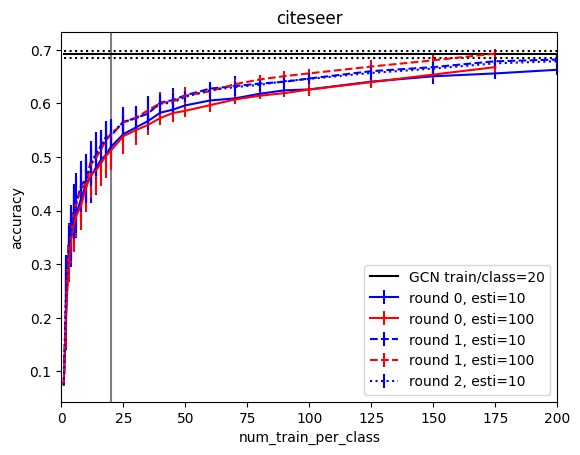

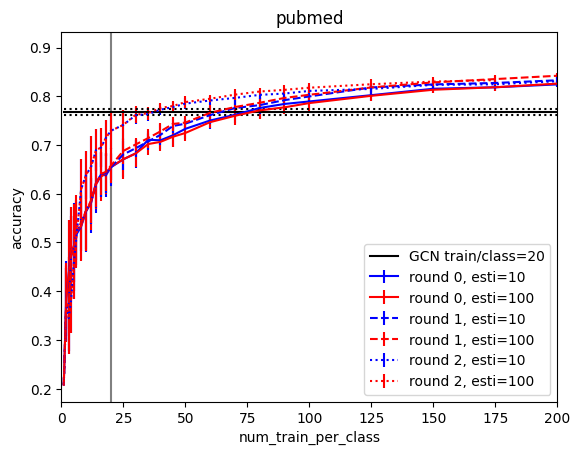

In [19]:
my_plot(df_agg, "value", x_lim=(0,200))